In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# Data provided 

1. Update Date and Time (ISO)
2. Update Duration (ms)
3. Reading Date and Time (ISO)
4. Air pressure (mb)
5. Air temperature (C) – A variable of interest.
6. Tide height (m) – Another variable of interest.
7. Wind direction (deg)
8. Wind gust speed (kn)
9. Wind speed (kn)
10. True air temperature (C) – Ground truth air temperature, against which you should compare your predictions.
11. True tide height (m) – Ground truth tide height, against which you should compare your predictions.
12. Independent tide height prediction (m) – These are some GP predictions prepared earlier for you to compare against, if you so choose.
13. Independent tide height deviation (m) – The standard deviation of the GP predictions above.
14. Dependent tide height prediction (m) – Another GP prediction built using three additional sensors not provided to you.
15. Dependent tide height deviation (m) – The standard deviation of the GP predictions above.
16. Independent air temperature prediction (C) – These are some GP predictions prepared earlier for you to compare against, if you so choose.
17. Independent air temperature deviation (C) – The standard deviation of the GP predictions above.
18. Dependent air temperature prediction (C) – Another GP prediction built using three additional sensors not provided to you.
19. Dependent air temperature deviation (C) – The standard deviation of the GP predictions above.

In [5]:
weather_data = pd.read_csv('sotonmet.txt')
cols = weather_data.columns
update_times = weather_data["Update Date and Time (ISO)"]
weather_data.dropna(inplace=True)

update_times = weather_data[cols[0]]
update_duration = weather_data[cols[1]]
reading_times = weather_data[cols[2]]
air_pressure = weather_data[cols[3]]
air_temp = weather_data[cols[4]]
tide_heights = weather_data[cols[5]]

date_conversion = lambda date_string: datetime.datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S')
reading_times = reading_times.apply(date_conversion)

In [6]:
print(air_temp)

1       16.7
2       16.0
3       15.9
4       16.1
6       17.4
        ... 
1250    16.4
1251    16.1
1252    16.0
1254    15.9
1255    15.6
Name: Air temperature (C), Length: 917, dtype: float64


In [7]:
def column_plotter(column_indices, figsize=(8,10), color="tab:red"):
    """Plot select"""
    fig, ax = plt.subplots(len(column_indices), 1, figsize=figsize)
    for i, col_no in enumerate(column_indices):
        ax[i].scatter(reading_times, weather_data[cols[col_no]], marker="x", s=5, color=color)
        ax[i].set_ylabel(cols[col_no])
    plt.tight_layout()
    plt.show()

# Variables for prediction

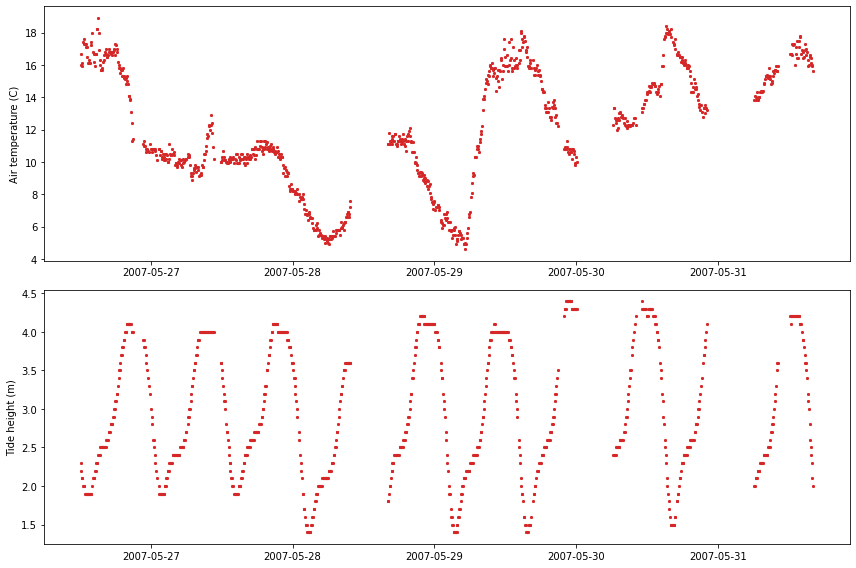

In [8]:
target_cols = [4, 5]
column_plotter(target_cols, figsize=(12,8))

# Other potentially useful inputs

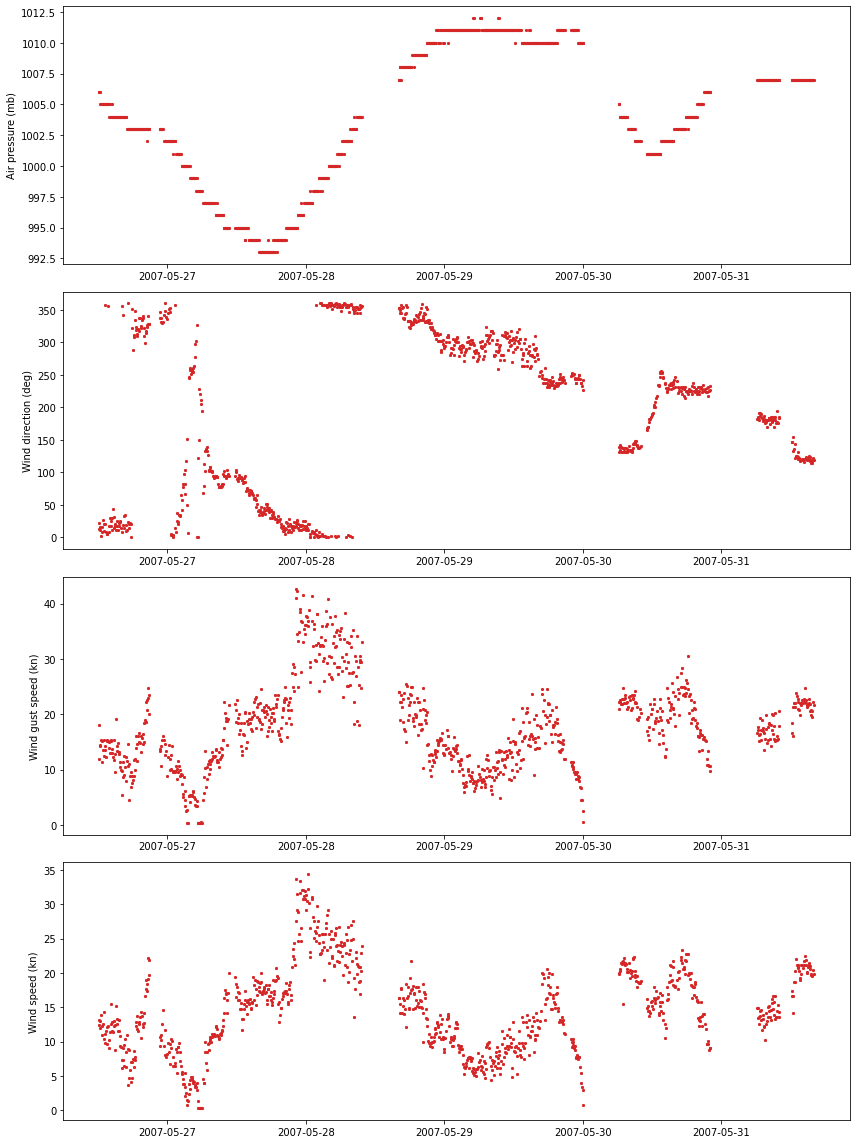

In [9]:
cols_of_interest = [3, 6, 7, 8]
column_plotter(cols_of_interest, figsize=(12, 16))

# Comparing wind speed / gust speed not much to be gained by adding both to model

Variance explained by single component : 97.52%


array([[0.77951785, 0.62638001]])

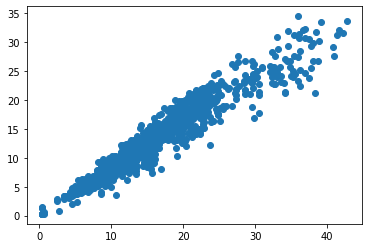

In [21]:
wind_gusts = weather_data[cols[7]].values
wind_speed = weather_data[cols[8]].values
stacked_wind = np.stack((wind_gusts, wind_speed))
plt.scatter(*stacked_wind)
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(stacked_wind.T)
print(f"Variance explained by single component : {round(100*pca.explained_variance_ratio_[0],2)}%")
pca.components_